# Plotting notebook
This notebook is intended to show how the circuit work and show the plots

In [1]:
from src.circuit import Circuit
import numpy as np

L = 4
circuits: list[Circuit] = []
n_circuits = 100
n_prob = 4
p = np.linspace(0, 0.5, n_prob)  # Probability of applying a unitary operator
for prob in p:
    for _ in range(n_circuits):
        circuits.append(Circuit(L, prob))
# Perform full circuit evolution
circuits = np.array(circuits)
steps = 100
entropies = np.zeros((n_circuits, steps + 1, n_prob))
for l, circuit in enumerate(circuits):
    k = l // n_circuits
    j = l % n_circuits
    entropies[j, 0, k] = circuit.state.entanglement_entropy()
    for i in range(1, steps + 1):
        circuit.full_circuit_evolution(1)
        entropies[j, i, k] = circuit.state.entanglement_entropy()

/home/pablo/projects/master/many_body_physics/project/src/state.py:80: RuntimeWarning: divide by zero encountered in log2
  entropy_terms = np.where(diag > 0, diag * np.log2(diag), 0)
/home/pablo/projects/master/many_body_physics/project/src/state.py:80: RuntimeWarning: invalid value encountered in multiply
  entropy_terms = np.where(diag > 0, diag * np.log2(diag), 0)


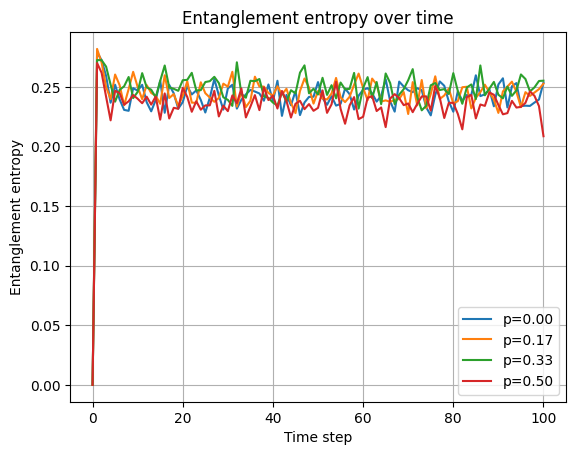

In [2]:
import matplotlib.pyplot as plt

for k in range(n_prob):
    plt.plot(np.average(entropies[:, :, k], axis=0) / L, label=f"p={p[k]:.2f}")
plt.xlabel("Time step")
plt.ylabel("Entanglement entropy")
plt.title("Entanglement entropy over time")
plt.legend()
plt.grid()

In [3]:
np.average(
    entropies[
        :,
        :,
    ],
    axis=0,
) 

array([[0.        , 0.        , 0.        , 0.        ],
       [1.19543504, 0.94994061, 1.2163032 , 1.13643481],
       [0.9743085 , 0.95264297, 1.08263387, 1.11753453],
       [0.76997361, 1.02055671, 0.94308656, 1.01254059],
       [1.00216712, 0.95988008, 1.08111667, 0.94659352],
       [0.86085544, 0.93088171, 0.97982169, 0.95731315],
       [1.01064596, 0.88325596, 0.89007348, 0.93018472],
       [0.90934362, 0.69595398, 0.9247305 , 1.03902855],
       [1.01846523, 0.58356609, 0.97500224, 0.98035185],
       [1.08249092, 0.84870273, 0.8828074 , 1.01590478],
       [0.82096192, 0.89516209, 0.88684833, 0.62042531],
       [1.01551699, 0.99663752, 1.08136359, 1.09509699],
       [0.96433702, 0.86854913, 1.0269485 , 1.01917179],
       [0.83062199, 0.91954742, 1.07280066, 0.90415332],
       [1.01239676, 0.95401324, 1.11320184, 1.15155748],
       [0.85787557, 0.75207493, 1.03104239, 1.14070773],
       [0.86695657, 0.6935677 , 0.92872925, 0.97424586],
       [0.98359641, 0.6865954 ,

In [4]:
np.average(
    entropies[
        :,
        :,
    ],
    axis=0,
) 

array([[0.        , 0.        , 0.        , 0.        ],
       [1.19543504, 0.94994061, 1.2163032 , 1.13643481],
       [0.9743085 , 0.95264297, 1.08263387, 1.11753453],
       [0.76997361, 1.02055671, 0.94308656, 1.01254059],
       [1.00216712, 0.95988008, 1.08111667, 0.94659352],
       [0.86085544, 0.93088171, 0.97982169, 0.95731315],
       [1.01064596, 0.88325596, 0.89007348, 0.93018472],
       [0.90934362, 0.69595398, 0.9247305 , 1.03902855],
       [1.01846523, 0.58356609, 0.97500224, 0.98035185],
       [1.08249092, 0.84870273, 0.8828074 , 1.01590478],
       [0.82096192, 0.89516209, 0.88684833, 0.62042531],
       [1.01551699, 0.99663752, 1.08136359, 1.09509699],
       [0.96433702, 0.86854913, 1.0269485 , 1.01917179],
       [0.83062199, 0.91954742, 1.07280066, 0.90415332],
       [1.01239676, 0.95401324, 1.11320184, 1.15155748],
       [0.85787557, 0.75207493, 1.03104239, 1.14070773],
       [0.86695657, 0.6935677 , 0.92872925, 0.97424586],
       [0.98359641, 0.6865954 ,

In [5]:
entropies[0, :, 0]

array([-0.        ,  1.38024927,  1.0595553 ,  0.17619682,  1.23689351,
        1.1711157 ,  0.47334167,  0.98367014,  1.2737571 ,  0.72625724,
        0.70027806,  1.32630636,  0.89464151,  0.51073288,  1.31143471,
        1.03697694,  0.3755442 ,  1.22697856,  1.17303317,  0.28364967,
        1.1159738 ,  1.25984984,  0.36697714,  1.08600923,  1.26141891,
        0.48607675,  1.10738875,  1.17227263,  0.60848869,  1.0333709 ,
        1.04288077,  0.77745493,  0.83073599,  1.01389092,  0.96012424,
        0.55081862,  1.15851669,  1.07168871,  0.26506392,  1.32209948,
        1.06251081,  0.08142575,  1.37923813,  0.99453549,  0.14388166,
        1.29297741,  1.0416983 ,  0.40664799,  1.07363316,  1.17099309,
        0.68687572,  0.75695413,  1.29713754,  0.8757409 ,  0.43154429,
        1.36463768,  0.99294903,  0.2376538 ,  1.34650171,  1.11692265,
        0.17989292,  1.23534793,  1.23114983,  0.33138405,  1.0736088 ,
        1.29119587,  0.53351375,  0.97168117,  1.27501897,  0.69